### Dataset description:

The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

In [159]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Streamlit/Streamlit checkpoint 2/Financial_inclusion_dataset.csv")

In [162]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## Data Inspection

In [163]:
df.shape

(23524, 13)

In [164]:
df.columns.tolist()

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [166]:
# check for duplicates
df.duplicated().sum()

0

In [167]:
# check for missing values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

- There are no missing values

In [168]:
# summary statistics of the data
df.describe().astype('int')

,year,household_size,age_of_respondent
count,23524,23524,23524
mean,2016,3,38
std,0,2,16
min,2016,1,16
25%,2016,2,26
50%,2017,3,35
75%,2018,5,49
max,2018,21,100


In [169]:
skewness = df.skew()
print(skewness)

year                 0.045664
household_size       0.988200
age_of_respondent    0.841686
dtype: float64


In [170]:
# Extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# # # Create a boxplot to show the distribution of each numerical variable
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=num_vars, palette='viridis')
# plt.title('Distribution of Numerical Variables')
# plt.xticks(rotation=45)
# plt.show()

year                   0
household_size       381
age_of_respondent    241
dtype: int64


In [171]:
# select the categorical variables
cat_vars = df.select_dtypes(include=['category', 'object'])
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

      country       uniqueid bank_account location_type cellphone_access  \
0       Kenya     uniqueid_1          Yes         Rural              Yes   
1       Kenya     uniqueid_2           No         Rural               No   
2       Kenya     uniqueid_3          Yes         Urban              Yes   
3       Kenya     uniqueid_4           No         Rural              Yes   
4       Kenya     uniqueid_5           No         Urban               No   
...       ...            ...          ...           ...              ...   
23519  Uganda  uniqueid_2113           No         Rural              Yes   
23520  Uganda  uniqueid_2114           No         Rural              Yes   
23521  Uganda  uniqueid_2115           No         Rural              Yes   
23522  Uganda  uniqueid_2116           No         Urban              Yes   
23523  Uganda  uniqueid_2117           No         Rural              Yes   

      gender_of_respondent relationship_with_head           marital_status  \
0        

## Exploratory Data Analysis

- Univariate
- Bivariate
- Multivariate

# 1

In [172]:
# Analyze the percentage of respondents with bank accounts to understand the level of financial inclusion in different countries or regions.

financial_inclusion_rates = df.groupby('country')['bank_account'].apply(lambda x: round((x == 'Yes').sum() / len(x) * 100, 2))
financial_inclusion_rates

country
Kenya       25.07
Rwanda      11.48
Tanzania     9.17
Uganda       8.61
Name: bank_account, dtype: float64

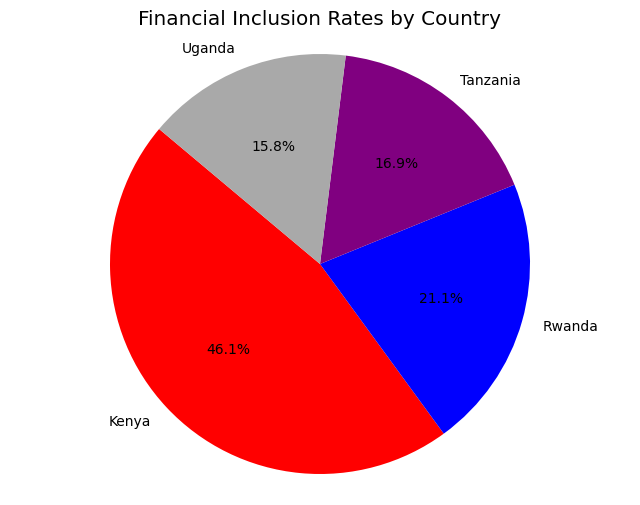

In [173]:
# Create a pie chart
# Data for the countries and their percentages
countries = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
percentages = [25.07, 11.48, 9.17, 8.61]
colors = ['red', 'blue', 'purple', 'darkgray']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=countries, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Financial Inclusion Rates by Country')

plt.show()

Uganda: The financial inclusion rate in Uganda is 15.8%, indicating that a relatively small proportion of respondents in Uganda have bank accounts.

Tanzania: Tanzania shows a slightly higher financial inclusion rate of 16.9% compared to Uganda.

Kenya: Kenya stands out with a significantly higher financial inclusion rate of 46.1%, showcasing a more substantial portion of respondents with bank accounts compared to the other countries.

Rwanda: Rwanda follows Kenya with a financial inclusion rate of 21.1%, indicating a moderate level of financial inclusion in the country.

# 2

In [174]:
df['location_type'].value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [175]:
# Investigate how location types (urban, rural) impact access to bank accounts.

df.groupby('bank_account')['location_type'].value_counts()

bank_account  location_type
No            Rural            12672
              Urban             7540
Yes           Rural             1671
              Urban             1641
Name: location_type, dtype: int64

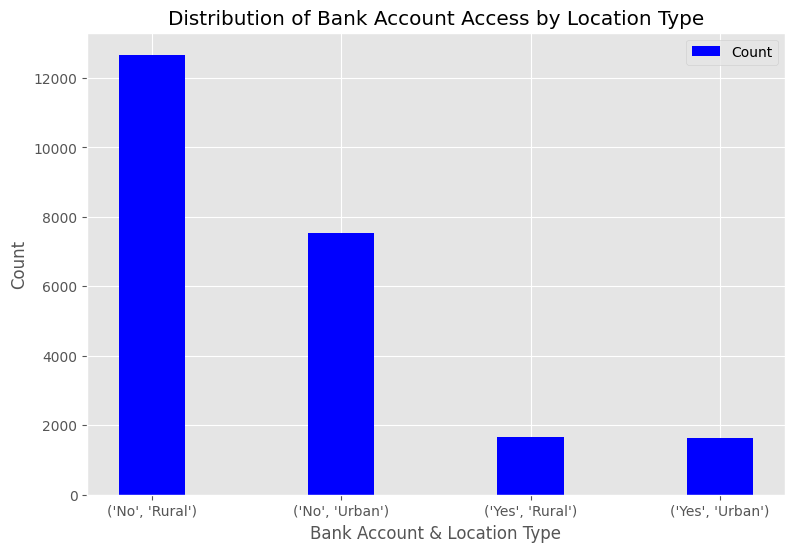

In [176]:
# Data for the statistics
data = {
    ('No', 'Rural'): 12672,
    ('No', 'Urban'): 7540,
    ('Yes', 'Rural'): 1671,
    ('Yes', 'Urban'): 1641
}

# Extracting the data for plotting
categories = list(data.keys())
values = [count for count in data.values()]

# Create a grouped bar chart
plt.figure(figsize=(9, 6))
bar_width = 0.35
index = range(len(categories))

plt.bar(index, values, bar_width, color='b', label='Count')

# Add labels
plt.xlabel('Bank Account & Location Type')
plt.ylabel('Count')
plt.title('Distribution of Bank Account Access by Location Type')
plt.xticks(index, categories)
plt.legend()

# Show the plot
plt.show()

The chart depicts the count of individuals with bank accounts categorized by location types ('Rural' and 'Urban').

In the 'Rural' area, the count of individuals with bank accounts ('Yes') is notably higher compared to the count in the 'Urban' area.
The data shows that there is a higher presence of individuals with bank accounts in rural locations compared to urban areas.
The disparity in bank account access between rural and urban areas suggests potential differences in financial inclusion and access to banking services based on location type.
This data story indicates that a significant number of individuals in rural areas have bank accounts compared to urban areas, pointing towards potential variations in financial services accessibility and utilization between these two location types.*
3

# 3

In [177]:
# Analyze how cellphone access influences the usage of bank accounts.

# Grouping the data by cellphone access and bank account
grouped_data = df.groupby(['cellphone_access', 'bank_account']).size().reset_index(name='count')

# Displaying the grouped data
print(grouped_data)

  cellphone_access bank_account  count
0               No           No   5966
1               No          Yes    104
2              Yes           No  14246
3              Yes          Yes   3208


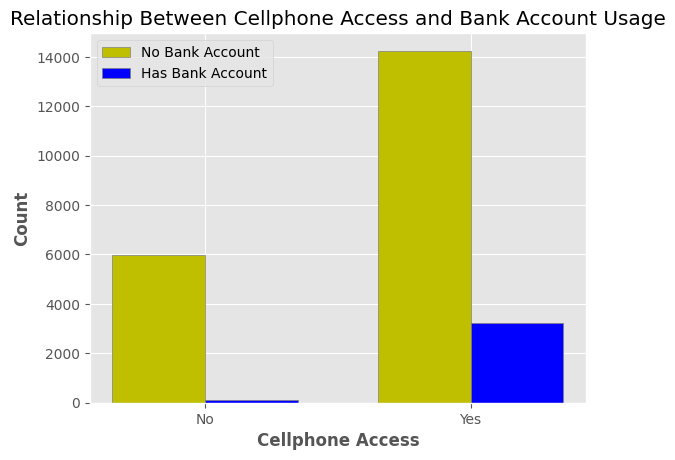

In [178]:
# Data for the grouped bar chart
cellphone_access = ['No', 'Yes']
bank_account = ['No', 'Yes']
counts = [5966, 104, 14246, 3208]

# Set the width of the bars
barWidth = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(cellphone_access))
r2 = [x + barWidth for x in r1]

# Create the grouped bar chart
plt.bar(r1, counts[::2], color='y', width=barWidth, edgecolor='grey', label='No Bank Account')
plt.bar(r2, counts[1::2], color='b', width=barWidth, edgecolor='grey', label='Has Bank Account')

# Add xticks on the middle of the group bars
plt.xlabel('Cellphone Access', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(cellphone_access))], cellphone_access)

# Add labels and title
plt.ylabel('Count', fontweight='bold')
plt.title('Relationship Between Cellphone Access and Bank Account Usage')
plt.legend()

# Show the plot
plt.show()

**The chart reveals a clear association between cellphone access and bank account usage.**

- For individuals without cellphone access ('No'), a higher count of them do not have a bank account compared to those who have a bank account.
- In contrast, for individuals with cellphone access ('Yes'), there is a significant increase in the count of individuals who have a bank account compared to those without a bank account.
- The data suggests that having cellphone access is strongly linked to having a bank account, as seen by the higher count of individuals with cellphone access who also have a bank account.

# 4

In [179]:
# Understand how household size and the relationship with the household head affect financial inclusion.

# Group by 'household_size' and 'relationship_with_head' and count occurrences of bank accounts
count_bank_account = df.groupby(['household_size', 'relationship_with_head'])['bank_account'].value_counts()

# Print the result
count_bank_account

household_size  relationship_with_head  bank_account
1               Child                   No                 6
                Head of Household       No              2424
                                        Yes              579
                Other non-relatives     No                 2
                Other relative          No                 3
                                                        ... 
16              Spouse                  No                 2
17              Head of Household       Yes                1
18              Spouse                  No                 1
20              Other relative          No                 1
21              Spouse                  No                 1
Name: bank_account, Length: 157, dtype: int64

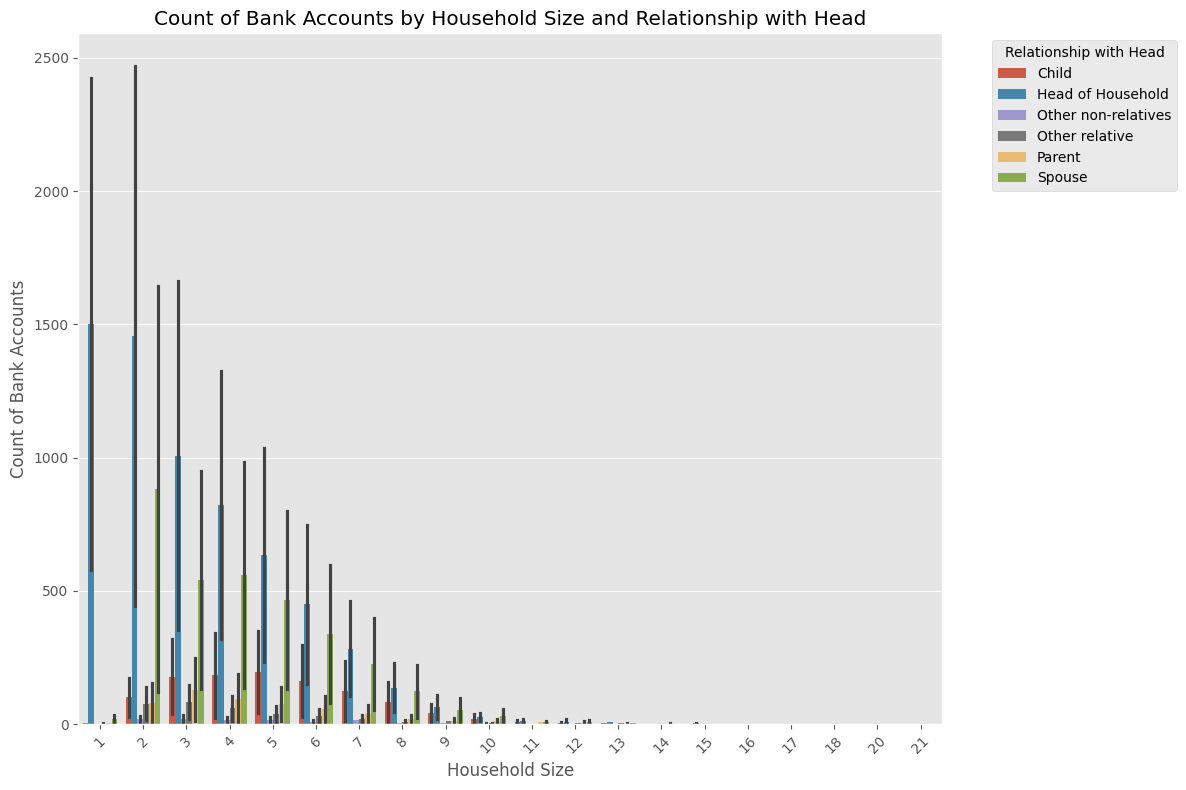

In [180]:
# Reset index to make 'household_size' and 'relationship_with_head' as columns
count_bank_account = count_bank_account.reset_index(name='count')

# Plot the count of individuals with bank accounts for each household size and relationship with head
plt.figure(figsize=(12, 8))
sns.barplot(data=count_bank_account, x='household_size', y='count', hue='relationship_with_head')
plt.xlabel('Household Size')
plt.ylabel('Count of Bank Accounts')
plt.title('Count of Bank Accounts by Household Size and Relationship with Head')
plt.xticks(rotation=45)
plt.legend(title='Relationship with Head', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

It can be observed that the majority of bank accounts are owned by households with 2 and 3 members. In terms of the relationship with the head of the household, bank accounts are predominantly held by the head of the household, followed by children, spouses, parents, and other non-relative individuals. The number of bank accounts tends to decrease as the household size increases.



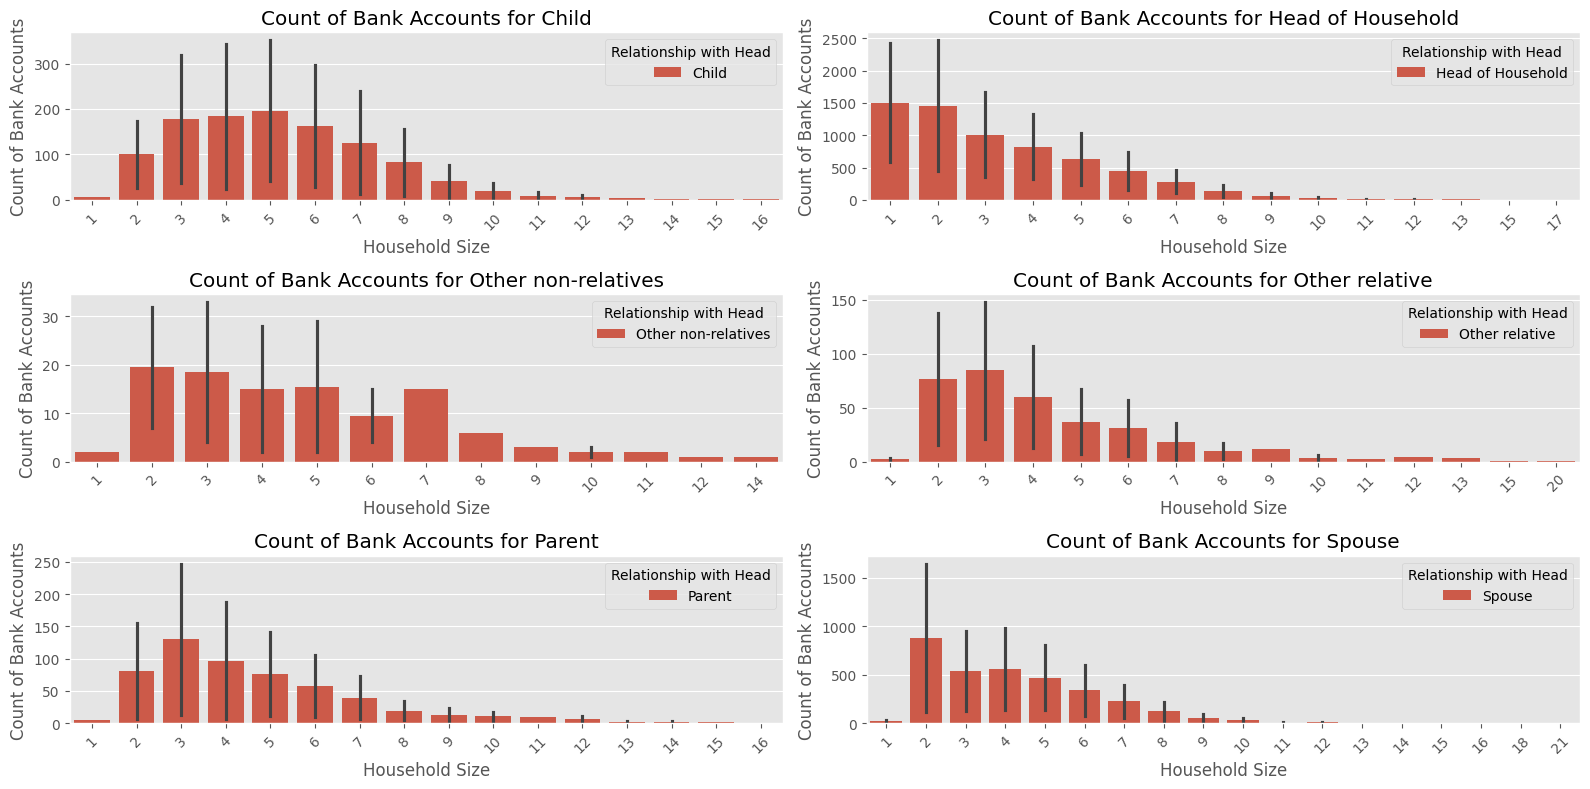

In [181]:
# Filter data for each relationship type with the head of the household
relationship_types = count_bank_account['relationship_with_head'].unique()

# Calculate the number of rows and columns for the subplot layout
num_plots = len(relationship_types)
num_cols = 2  # Number of columns for the subplot layout
num_rows = (num_plots + num_cols - 1) // num_cols  # Round up to the nearest integer

plt.figure(figsize=(16, 8))

# Create subplots for each relationship type
for i, relationship_type in enumerate(relationship_types, start=1):
    plt.subplot(num_rows, num_cols, i)
    relationship_data = count_bank_account[count_bank_account['relationship_with_head'] == relationship_type]
    sns.barplot(data=relationship_data, x='household_size', y='count', hue='relationship_with_head')
    plt.xlabel('Household Size')
    plt.ylabel('Count of Bank Accounts')
    plt.title(f'Count of Bank Accounts for {relationship_type}')
    plt.xticks(rotation=45)
    plt.legend(title='Relationship with Head')
    plt.tight_layout()

plt.show()

The chart displays the count of bank accounts categorized by different relationships with the head of the household. It shows that the head of the household holds the highest number of bank accounts, followed by other relatives, children, spouses, parents, and other non-relatives. In terms of household size, families with 2 to 3 members tend to have a higher count of bank accounts compared to larger households.

# 5

In [182]:
# Explore how age and gender of respondents correlate with the likelihood of having a bank account.

# Convert 'bank_account' column to numerical values
df['bank_account_numeric'] = df['bank_account'].map({'No': 0, 'Yes': 1})

# Group by 'age_of_respondent' and 'gender_of_respondent' and calculate the mean of 'bank_account_numeric'
mean_bank_account = df.groupby(['age_of_respondent', 'gender_of_respondent'])['bank_account_numeric'].mean()

# Print the result
mean_bank_account

age_of_respondent  gender_of_respondent
16                 Female                  0.012295
                   Male                    0.009174
17                 Female                  0.019685
                   Male                    0.022422
18                 Female                  0.033639
                                             ...   
98                 Female                  0.000000
                   Male                    0.000000
99                 Female                  0.000000
100                Female                  0.000000
                   Male                    0.000000
Name: bank_account_numeric, Length: 168, dtype: float64

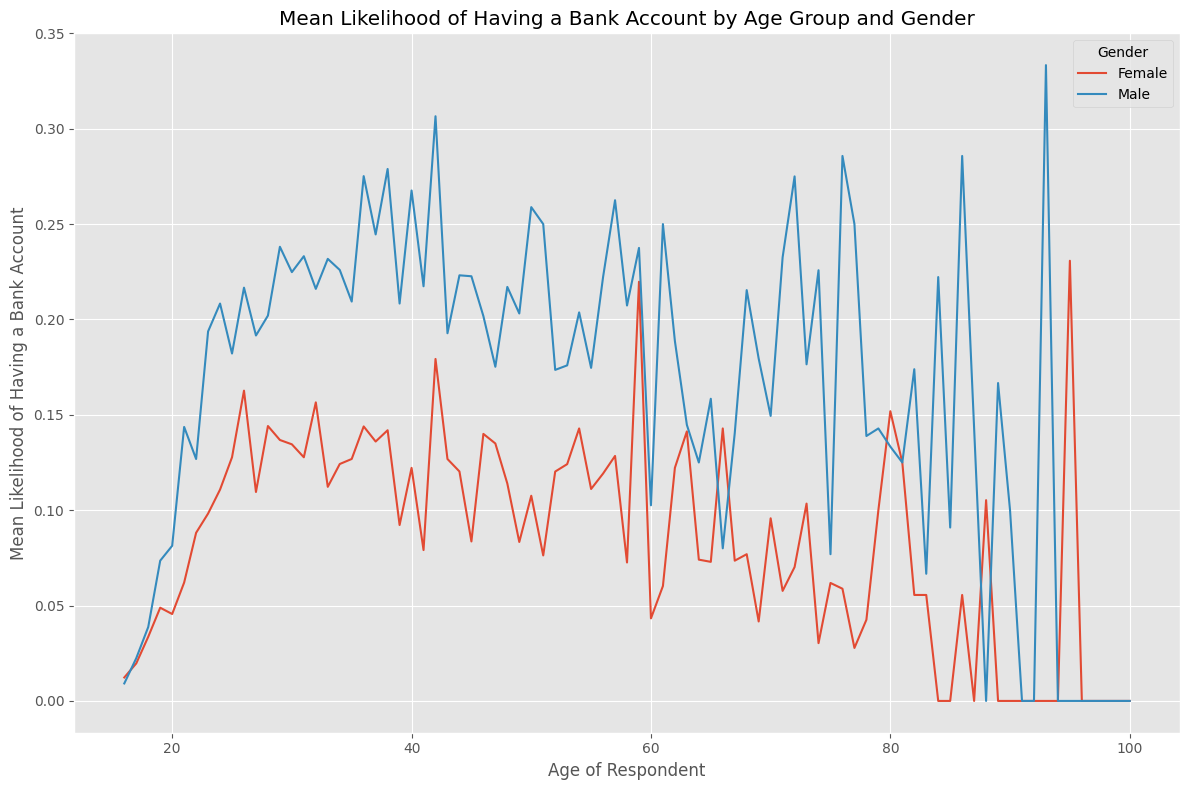

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to make 'age_of_respondent' and 'gender_of_respondent' as columns
mean_bank_account = mean_bank_account.reset_index()

# Plot the mean likelihood of having a bank account by age group and gender
plt.figure(figsize=(12, 8))
sns.lineplot(data=mean_bank_account, x='age_of_respondent', y='bank_account_numeric', hue='gender_of_respondent')
plt.title('Mean Likelihood of Having a Bank Account by Age Group and Gender')
plt.xlabel('Age of Respondent')
plt.ylabel('Mean Likelihood of Having a Bank Account')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


From the graph, it can be observed that generally, males have a higher mean likelihood of having a bank account compared to females across all age groups. Additionally, the likelihood of having a bank account tends to increase with age for both genders, with older individuals showing a higher mean likelihood compared to younger ones.

This data suggests that there is a correlation between age, gender, and the likelihood of owning a bank account, with older individuals and males having a higher tendency to have bank accounts.

# 6

In [184]:
# Study how education level and job type influence financial inclusion and access to banking services.

# Group the data by 'education_level' and 'job_type' and count the occurrences of each combination
grouped = df.groupby(['education_level', 'job_type']).size().reset_index(name='count')
grouped

,education_level,job_type,count
0,No formal education,Dont Know/Refuse to answer,18
1,No formal education,Farming and Fishing,1405
2,No formal education,Formally employed Government,4
3,No formal education,Formally employed Private,33
4,No formal education,Government Dependent,131
5,No formal education,Informally employed,1130
6,No formal education,No Income,116
7,No formal education,Other Income,184
8,No formal education,Remittance Dependent,494
9,No formal education,Self employed,1000


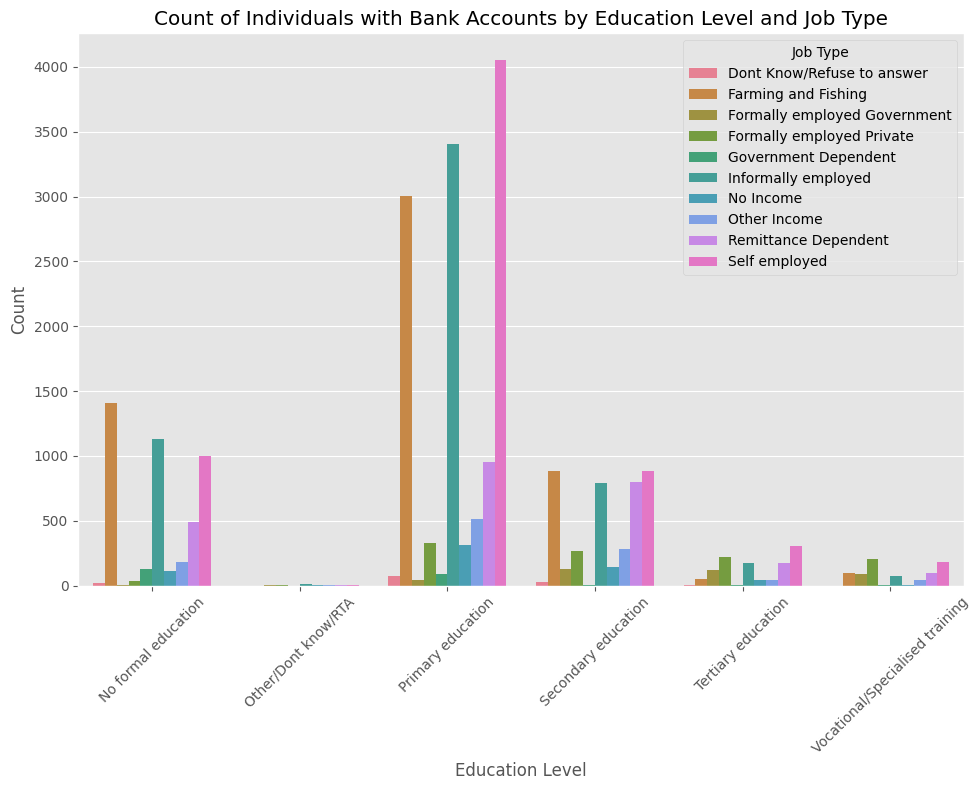

In [185]:
# Plot the count of individuals with bank accounts for each education level and job type
plt.figure(figsize=(10, 8))
sns.barplot(data=grouped, x='education_level', y='count', hue='job_type')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Individuals with Bank Accounts by Education Level and Job Type')
plt.xticks(rotation=45)
plt.legend(title='Job Type', loc='upper right')
plt.tight_layout()
plt.show()

Generally, individuals with higher education levels such as tertiary education and specialized training have a higher count of bank accounts compared to those with lower levels of education. Additionally, individuals who are formally employed in either the government or private sector tend to have more bank accounts than those who are informally employed or have no regular income.

This data indicates a correlation between education level, job type, and bank account ownership, with individuals with higher education and formal employment having a higher number of bank accounts.

## Convert Categorical Columns to Numerical
- One Hot Encoding
- Label Encoder

In [126]:
cat_vars.columns.tolist()

['country',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [186]:
df.drop(['uniqueid','bank_account_numeric'], axis = 1, inplace = True)

In [187]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = ['country',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())

   country  year  bank_account  location_type  cellphone_access  \
0        0  2018             1              0                 1   
1        0  2018             0              0                 0   
2        0  2018             1              1                 1   
3        0  2018             0              0                 1   
4        0  2018             0              1                 0   

   household_size  age_of_respondent  gender_of_respondent  \
0               3                 24                     0   
1               5                 70                     0   
2               5                 26                     1   
3               5                 34                     0   
4               8                 26                     1   

   relationship_with_head  marital_status  education_level  job_type  
0                       5               2                3         9  
1                       1               4                0         4  
2          

In [188]:
# Check the column names in the DataFrame
print("Columns in DataFrame:")
print(df.columns)

Columns in DataFrame:
Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')


## Feature Selection

In [189]:
X = df.drop(["bank_account"], axis = 1)  # Features
y = df["bank_account"]                     #  Target variable
X

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,5,26,1,3,3,5,9
3,0,2018,0,1,5,34,0,1,2,2,3
4,0,2018,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,1,4,48,0,1,0,0,7
23520,3,2018,0,1,2,27,0,1,3,3,7
23521,3,2018,0,1,5,27,0,4,4,2,7
23522,3,2018,1,1,7,30,0,4,0,3,9


In [190]:
y.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

- The target  variable is not balanved so we balance it so our model will be able to generalise well on unseen data and not have a bias in regards to the minority variable

In [191]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 20212, 1: 3312})
Class distribution after resampling: Counter({1: 20212, 0: 20212})


## Train-Test-Split
Split the dataset into training and testing sets. We will allocate a certain percentage of 80-20 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.

In [192]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [193]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (32339, 11)
The X_test shape: (8085, 11)
The y_train shape: (32339,)
The y_test shape: (8085,)


# Scaling of Data
## MinMax Scaler

In [194]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Selection
The following algortihms for the model selection include:

- Logistic Regression
- Decision Tree
- Support Vector Machine
- K-Nearest Neighbor

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

## Model Training
- Import the necessary libraries for each algorithms
- create an instance of each model
- fit the models to the training data using the fit method

### Logistic Regression

In [196]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [197]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 72.8 %


In [198]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.7282622139764997,
 'Precision': 0.7187721369539551,
 'Recall': 0.7516049382716049,
 'F1-Score': 0.7348219674109837}

## Decision Tree

In [199]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [200]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 85.8 %


In [201]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.8578849721706865,
 'Precision': 0.8426647767540751,
 'Recall': 0.8807407407407407,
 'F1-Score': 0.86128214415067}

## K-Nearest Neighbour

In [202]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [203]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neigbour
print(f'The accuracy of the KNN is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the KNN is 84.1 %


In [204]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.8409400123685838,
 'Precision': 0.8162471395881007,
 'Recall': 0.8807407407407407,
 'F1-Score': 0.8472684085510689}

## Model Evaluation
- Evaluate the models using classification reports and confusion matrices

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

No_bank_account      0.739     0.705     0.721      4035
   bank_account      0.719     0.752     0.735      4050

       accuracy                          0.728      8085
      macro avg      0.729     0.728     0.728      8085
   weighted avg      0.729     0.728     0.728      8085



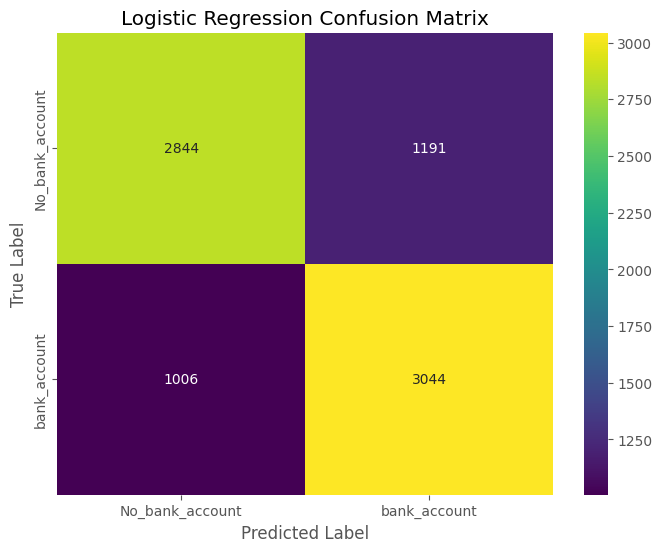

Decision Tree Classification Report:
                 precision    recall  f1-score   support

No_bank_account      0.875     0.835     0.854      4035
   bank_account      0.843     0.881     0.861      4050

       accuracy                          0.858      8085
      macro avg      0.859     0.858     0.858      8085
   weighted avg      0.859     0.858     0.858      8085



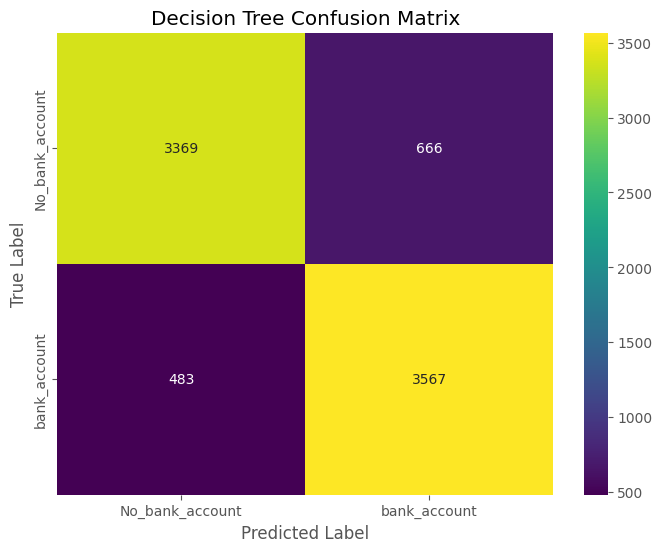

KNN Classification Report:
                 precision    recall  f1-score   support

No_bank_account      0.870     0.801     0.834      4035
   bank_account      0.816     0.881     0.847      4050

       accuracy                          0.841      8085
      macro avg      0.843     0.841     0.841      8085
   weighted avg      0.843     0.841     0.841      8085



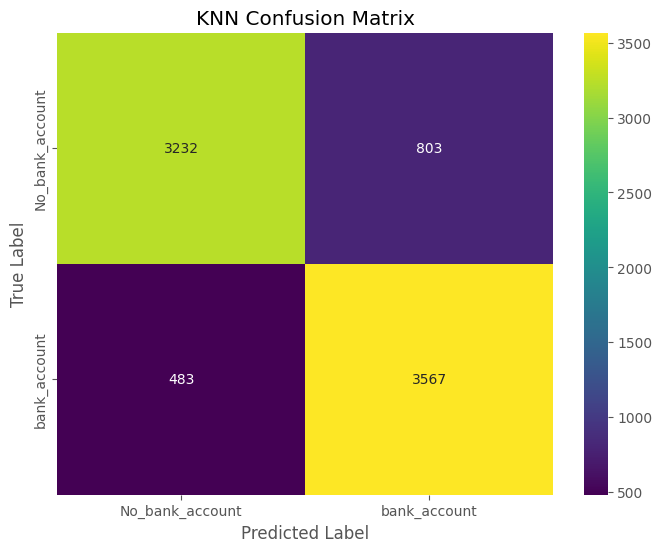

In [205]:
from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a list of models and their corresponding names
models = [lr_model, dt_model,knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN']

# Set the labels
labels = ['No_bank_account', 'bank_account']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)

    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [206]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, knn_result])

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.728262,0.718772,0.751605,0.734822
1,dt_model,0.857885,0.842665,0.880741,0.861282
2,knn_model,0.840940,0.816247,0.880741,0.847268


## AUC-ROC

The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [207]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)
# Calculate the AUC-ROC for KNN
knn_auc = roc_auc_score(y_test, knn_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'K-Nearest Neighbor AUC-ROC: {knn_auc:.2f}')

Logistic Regression AUC-ROC: 0.81
Decision Tree AUC-ROC: 0.88
K-Nearest Neighbor AUC-ROC: 0.91


In [208]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

age_of_respondent: 0.29
education_level: 0.15
household_size: 0.12
job_type: 0.11
country: 0.08
cellphone_access: 0.07
marital_status: 0.05
relationship_with_head: 0.04
year: 0.03
location_type: 0.03
gender_of_respondent: 0.02


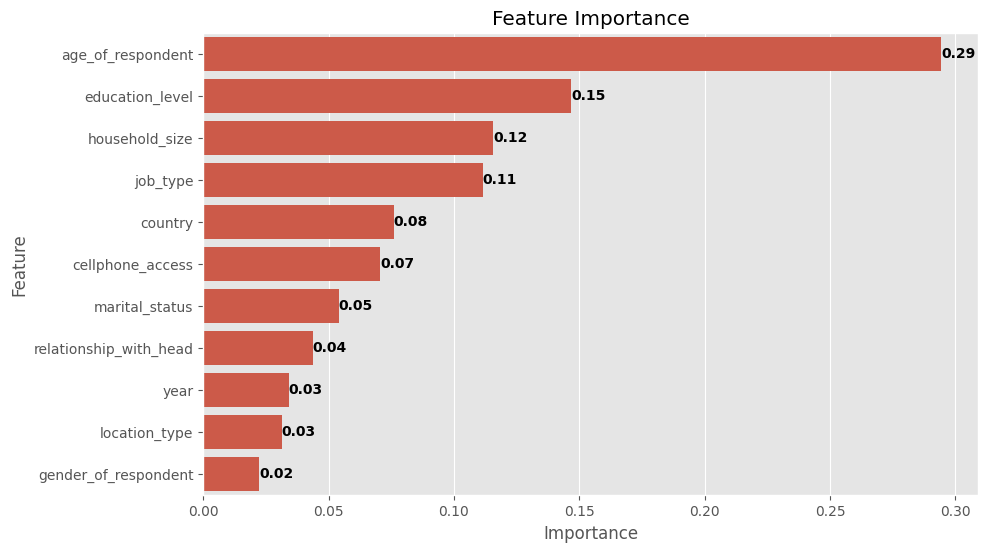

In [209]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

### A Bit of Features Selection
We will use the following features; REGULARITY, followed by REGION, REVENUE, ARPU_SEGMENT, MONTANT AND ON_NET to retrain the Decision Tree model.

In [210]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2)

X_train2 = X_train[['age_of_respondent', 'education_level', 'household_size', 'job_type','country','cellphone_access','location_type']]
X_valid2 = X_valid[['age_of_respondent', 'education_level','household_size', 'job_type','country','cellphone_access','location_type']]

In [211]:
# Since Decision Tree model is the best performing model

# fit the model on the new training set
dt_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = dt_model.predict(X_valid2)

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.83
Precision Score: 0.85
Recall Score: 0.82
F1-score: 0.84


# Saving the base line model using Pickle
- In Python,the pickle module is used for serializing objects.serialization is the process of converting a python object into a byte stream,and deserialization is the reverse process of reconstructing the python object from the byte stream

In [213]:
# Saving the model
import pickle
pickle_out=open('classifier.pkl',mode='wb')
pickle.dump(dt_model,pickle_out)
pickle_out.close()

# Model Deployment of the Bank_account Prediction Model using Streamlit
- We will start with the basic installations:

In [214]:
# !pip install -q pyngrok

# !pip install -q streamlit

# !pip install -q streamlit_ace

- we have installed 3 libraries here.pyngrok is a python wrapper for ngrok which helps to open secure tunnels from public URLs to localhost.This will help us host our web app.Streamlit will be used to make our web app.

In [ ]:
# %%writefile app.py

import pickle
import streamlit as st

# Loading the trained model
@st.cache()
def load_model():
    with open('classifier.pkl', 'rb') as file:
        model = pickle.load(file)
    return model

classifier = load_model()

# defining the function which will make the prediction using the data which the user inputs
def prediction(gender_of_respondent,age_of_respondent,household_size,country,location_type,cellphone_access,education_level):

    # Pre-preprocessing User input
    if gender_of_respondent == "Male":
      gender_of_respondent = 0
    else:
      gender_of_respondent = 1


    if location_type == "Rural":
      location_type = 0
    else:
      location_type = 1

    if cellphone_access == "Yes":
      cellphone_access = 1
    else:
      cellphone_access = 0

    if country == "Kenya":
      country = 0
    elif country == "Rwanda":
      country = 1
    elif country == "Tanzania":
      country = 2
    else:
      country = 3

    if education_level == "No formal education":
      education_level = 0
    elif education_level == "Other/Dont know/RTA":
      education_level = 1
    elif education_level == "Primary education":
      education_level = 2
    elif education_level == "Secondary education":
      education_level = 3
    elif education_level == "Tertiary education":
      education_level = 4
    else:
      education_level = 5

    # Making predictions
    prediction = classifier.predict([[gender_of_respondent,age_of_respondent,household_size,country,location_type,cellphone_access,education_level]])
    if prediction == 0:
        pred = 'No Bank Account'
    else:
        pred = 'Bank Account'
    return pred

# This is the main function in which we define our webpage
def main():
    # front end elements of the web page
    html_temp = '''
    <div style='background-color: yellow; padding: 13px'>
    <h1 style='color: yellow; text-align: center;'>Streamlit bank_account Prediction ML App</h1>
    </div>
    '''
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True)

    # following Lines create boxes in which user can enter data required to make prediction
    HOUSEHOLD_SIZE = st.number_input("HOUSEHOLD_SIZE")
    COUNTRY = st.selectbox('country', df['country'].unique())
    LOCATION_TYPE =  st.selectbox('Location_type', df['location_type'].unique())
    CELLPHONE_ACCESS = st.number_input("CELLPHONE_ACCESS")
    EDUCATION_LEVEL = st.selectbox('Education_level', df['education_level'].unique())
    AGE = st.number_input("age_of_respondent")
    GENDER_OF_RESPONDENT = st.selectbox('Gender of Respondent', df['gender_of_respondent'].unique())

    result = ""

    # when 'predict' is clicked, make the prediction and store it
    if st.button("Predict"):
            result = prediction(gender_of_respondent,age_of_respondent,household_size,country,location_type,cellphone_access,education_level)
            st.success('Customer is {}'.format(result))

if __name__ == '__main__':
    main()


In [ ]:
import pickle
import streamlit as st

# Loading the trained model
@st.cache()
def load_model():
    try:
        with open('classifier.pkl', 'rb') as file:
            model = pickle.load(file)
        return model
    except FileNotFoundError:
        st.error("Model file not found. Please ensure that the model file exists.")
        return None
    except Exception as e:
        st.error(f"An error occurred while loading the model: {str(e)}")
        return None

classifier = load_model()

# Preprocessing mappings
gender_of_respondent_map =  {"Female": 0, "Male": 1}
location_type_map = {"Rural": 0, "Urban": 1}
cellphone_access_map = {"No": 0, "Yes": 1}
country_map = {"Kenya": 0, "Rwanda": 1, "Tanzania": 2, "Other": 3}
education_level_map = {
    "No formal education": 0,
    "Other/Dont know/RTA": 1,
    "Primary education": 2,
    "Secondary education": 3,
    "Tertiary education": 4,
    "Other": 5
}

# defining the function which will make the prediction using the data which the user inputs
def prediction(gender_of_respondent, age_of_respondent, household_size, country, location_type, cellphone_access, education_level):
    # Preprocess user input
    gender_of_respondent = gender_of_respondent_map.get(gender_of_respondent, 0)  # Default to 0 if not found
    location_type = location_type_map.get(location_type, 0)  # Default to 0 if not found
    cellphone_access = cellphone_access_map.get(cellphone_access, 0)
    country = country_map.get(country, 3)  # Default to 3 if not found
    education_level = education_level_map.get(education_level, 5)  # Default to 5 if not found

    # Making predictions
    prediction = classifier.predict([[gender_of_respondent, age_of_respondent, household_size, country, location_type, cellphone_access, education_level]])
    return 'Bank Account' if prediction == 1 else 'No Bank Account'

# This is the main function in which we define our webpage
def main():
    # Front end elements of the web page
    html_temp = '''
    <div style='background-color: yellow; padding: 13px'>
    <h1 style='color: blue; text-align: center;'>Streamlit Bank Account Prediction ML App</h1>
    </div>
    '''
    # Display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True)

    # Following lines create boxes in which user can enter data required to make prediction
    household_size = st.number_input("HOUSEHOLD_SIZE")
    country = st.selectbox('Country', ["Kenya", "Rwanda", "Tanzania", "Uganda"])
    location_type = st.selectbox('Location Type', ["Rural", "Urban"])
    cellphone_access = st.selectbox('Cellphone Access', ["No", "Yes"])
    education_level = st.selectbox('Education Level', ["No formal education", "Other/Dont know/RTA", "Primary education", "Secondary education", "Tertiary education", "Vocational/Specialised training"])
    age_of_respondent = st.number_input("Age of Respondent")
    gender_of_respondent = st.selectbox('Gender of Respondent', ["Male", "Female"])

    result = ""

    # When 'predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(gender_of_respondent, age_of_respondent, household_size, country, location_type, cellphone_access, education_level)
        st.success(f'Customer is {result}')

if __name__ == '__main__':
    main()


In [ ]:
from pyngrok import ngrok

# set your ngrok authentication token

ngrok.set_auth_token("2dDbVL9JNQV4RSE9PGAeIIXR563_5cJigq5LfJsm4QxbP7i4W")

# connect to ngrok with authentication
public_url=ngrok.connect(8501)
public_url